# London Weather Dataset Temperature With Time Period Information

In [341]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

## Importing the dataset

In [342]:
!cp "/content/drive/MyDrive/Colab Notebooks/London/london_weather.csv" "/content/londonweather.csv"

In [343]:
df = pd.read_csv('/content/londonweather.csv')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [344]:
df.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [345]:
df.index = pd.to_datetime(df['date'], format='%Y%m%d')
df[:25]

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
1979-01-06,19790106,5.0,3.8,39.0,8.3,-0.5,-6.6,0.7,102780.0,1.0
1979-01-07,19790107,8.0,0.0,13.0,8.5,1.5,-5.3,5.2,102520.0,0.0
1979-01-08,19790108,8.0,0.1,15.0,5.8,6.9,5.3,0.8,101870.0,0.0
1979-01-09,19790109,4.0,5.8,50.0,5.2,3.7,1.6,7.2,101170.0,0.0


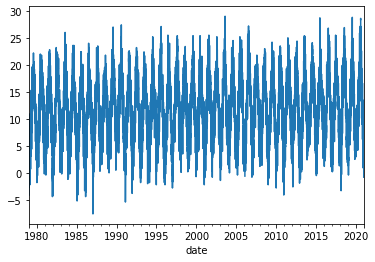

In [346]:
temp = df['mean_temp']
temp.plot()

In [347]:
#df[' _tempm'].fillna(df[' _tempm'].mean(), inplace = True)
df['mean_temp'] = df['mean_temp'].interpolate()

In [348]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [349]:
WINDOW_SIZE = 30
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((15311, 30, 1), (15311,))

In [350]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
date,,
1979-01-01,-4.1,2.839968e+08
1979-01-02,-2.6,2.840832e+08
1979-01-03,-2.8,2.841696e+08
1979-01-04,-2.6,2.842560e+08
1979-01-05,-0.8,2.843424e+08
...,...,...
2020-12-27,7.5,1.609027e+09
2020-12-28,1.1,1.609114e+09
2020-12-29,2.6,1.609200e+09


## Dataset pre-processing

In [351]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
date,,,,,,
1979-01-01,-4.1,283996800.0,-6.132363e-13,1.0,-0.003140,0.999995
1979-01-02,-2.6,284083200.0,4.732355e-14,1.0,0.014063,0.999901
1979-01-03,-2.8,284169600.0,-2.930095e-12,1.0,0.031261,0.999511
1979-01-04,-2.6,284256000.0,-2.269536e-12,1.0,0.048450,0.998826
1979-01-05,-0.8,284342400.0,-1.608976e-12,1.0,0.065624,0.997844


In [352]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
date,,,,,
1979-01-01,-4.1,-6.132363e-13,1.0,-0.003140,0.999995
1979-01-02,-2.6,4.732355e-14,1.0,0.014063,0.999901
1979-01-03,-2.8,-2.930095e-12,1.0,0.031261,0.999511
1979-01-04,-2.6,-2.269536e-12,1.0,0.048450,0.998826
1979-01-05,-0.8,-1.608976e-12,1.0,0.065624,0.997844


In [353]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [354]:
WINDOW_SIZE = 30
X2, y2 = df_to_X_y2(temp_df, WINDOW_SIZE)
X2.shape, y2.shape

((15311, 30, 5), (15311,))

## Splitting the dataset

In [355]:
X2_train, y2_train = X2[:12248], y2[:12248]
X2_val, y2_val = X2[12248:13780], y2[12248:13780]
X2_test, y2_test = X2[13780:], y2[13780:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((12248, 30, 5), (12248,), (1532, 30, 5), (1532,), (1531, 30, 5), (1531,))

In [356]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [357]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 6.09908953e-01, -7.59791994e-12,  1.00000000e+00,
         -9.90338867e-01, -1.38668410e-01],
        [ 9.07175080e-01, -3.29938132e-12,  1.00000000e+00,
         -9.92577697e-01, -1.21612154e-01],
        [ 1.16946872e+00,  9.99157301e-13,  1.00000000e+00,
         -9.94522794e-01, -1.04519909e-01],
        ...,
        [ 5.03491860e-02, -7.95269898e-12,  1.00000000e+00,
         -9.47536266e-01,  3.19648283e-01],
        [-1.59485727e-01, -3.65416035e-12,  1.00000000e+00,
         -9.41897497e-01,  3.35900438e-01],
        [-2.64403183e-01,  6.44378268e-13,  1.00000000e+00,
         -9.35979995e-01,  3.52053190e-01]],

       [[ 9.07175080e-01, -3.29938132e-12,  1.00000000e+00,
         -9.92577697e-01, -1.21612154e-01],
        [ 1.16946872e+00,  9.99157301e-13,  1.00000000e+00,
         -9.94522794e-01, -1.04519909e-01],
        [ 5.04991497e-01, -9.25421931e-12,  1.00000000e+00,
         -9.96173585e-01, -8.73967337e-02],
        ...,
        [-1.59485727e-01, -3.6541603

## Building the model

In [358]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model4 = Sequential()
model4.add(InputLayer((30, 5)))
model4.add(LSTM(64))
model4.add(Dense(32, 'relu'))
model4.add(Dense(32, 'relu'))
model4.add(Dense(16, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 64)                17920     
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 21,601
Trainable params: 21,601
Non-trainable params: 0
_________________________________________________________________


In [359]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

## Training

In [360]:
history1 = model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=100, callbacks=[cp4])

Epoch 1/100
381/383 [============================>.] - ETA: 0s - loss: 73.7645 - root_mean_squared_error: 8.5886

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


383/383 [==============================] - 14s 31ms/step - loss: 73.4683 - root_mean_squared_error: 8.5714 - val_loss: 7.0274 - val_root_mean_squared_error: 2.6509
Epoch 2/100
382/383 [============================>.] - ETA: 0s - loss: 7.0197 - root_mean_squared_error: 2.6495

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


383/383 [==============================] - 11s 29ms/step - loss: 7.0167 - root_mean_squared_error: 2.6489 - val_loss: 5.7017 - val_root_mean_squared_error: 2.3878
Epoch 3/100
383/383 [==============================] - ETA: 0s - loss: 6.2139 - root_mean_squared_error: 2.4928

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


383/383 [==============================] - 11s 28ms/step - loss: 6.2139 - root_mean_squared_error: 2.4928 - val_loss: 5.0706 - val_root_mean_squared_error: 2.2518
Epoch 4/100
383/383 [==============================] - ETA: 0s - loss: 5.5275 - root_mean_squared_error: 2.3511

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


383/383 [==============================] - 12s 31ms/step - loss: 5.5275 - root_mean_squared_error: 2.3511 - val_loss: 4.5375 - val_root_mean_squared_error: 2.1301
Epoch 5/100
381/383 [============================>.] - ETA: 0s - loss: 4.9069 - root_mean_squared_error: 2.2151

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


383/383 [==============================] - 11s 29ms/step - loss: 4.9094 - root_mean_squared_error: 2.2157 - val_loss: 4.1248 - val_root_mean_squared_error: 2.0310
Epoch 6/100
383/383 [==============================] - ETA: 0s - loss: 4.3974 - root_mean_squared_error: 2.0970

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


383/383 [==============================] - 11s 29ms/step - loss: 4.3974 - root_mean_squared_error: 2.0970 - val_loss: 3.7880 - val_root_mean_squared_error: 1.9463
Epoch 7/100
382/383 [============================>.] - ETA: 0s - loss: 4.0311 - root_mean_squared_error: 2.0078

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


383/383 [==============================] - 12s 31ms/step - loss: 4.0290 - root_mean_squared_error: 2.0072 - val_loss: 3.5534 - val_root_mean_squared_error: 1.8850
Epoch 8/100
381/383 [============================>.] - ETA: 0s - loss: 3.7783 - root_mean_squared_error: 1.9438

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


383/383 [==============================] - 11s 28ms/step - loss: 3.7781 - root_mean_squared_error: 1.9437 - val_loss: 3.4430 - val_root_mean_squared_error: 1.8555
Epoch 9/100
383/383 [==============================] - ETA: 0s - loss: 3.5917 - root_mean_squared_error: 1.8952

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


383/383 [==============================] - 13s 33ms/step - loss: 3.5917 - root_mean_squared_error: 1.8952 - val_loss: 3.3943 - val_root_mean_squared_error: 1.8424
Epoch 10/100
383/383 [==============================] - ETA: 0s - loss: 3.4912 - root_mean_squared_error: 1.8685

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


383/383 [==============================] - 12s 30ms/step - loss: 3.4912 - root_mean_squared_error: 1.8685 - val_loss: 3.2904 - val_root_mean_squared_error: 1.8139
Epoch 11/100
380/383 [============================>.] - ETA: 0s - loss: 3.4423 - root_mean_squared_error: 1.8553

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


383/383 [==============================] - 11s 28ms/step - loss: 3.4441 - root_mean_squared_error: 1.8558 - val_loss: 3.2225 - val_root_mean_squared_error: 1.7951
Epoch 12/100
383/383 [==============================] - 7s 17ms/step - loss: 3.3908 - root_mean_squared_error: 1.8414 - val_loss: 3.2496 - val_root_mean_squared_error: 1.8027
Epoch 13/100
382/383 [============================>.] - ETA: 0s - loss: 3.3831 - root_mean_squared_error: 1.8393

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


383/383 [==============================] - 11s 28ms/step - loss: 3.3823 - root_mean_squared_error: 1.8391 - val_loss: 3.2047 - val_root_mean_squared_error: 1.7902
Epoch 14/100
383/383 [==============================] - 6s 16ms/step - loss: 3.3719 - root_mean_squared_error: 1.8363 - val_loss: 3.2737 - val_root_mean_squared_error: 1.8093
Epoch 15/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3643 - root_mean_squared_error: 1.8342 - val_loss: 3.2966 - val_root_mean_squared_error: 1.8157
Epoch 16/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3462 - root_mean_squared_error: 1.8293 - val_loss: 3.2275 - val_root_mean_squared_error: 1.7965
Epoch 17/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3679 - root_mean_squared_error: 1.8352 - val_loss: 3.2141 - val_root_mean_squared_error: 1.7928
Epoch 18/100
383/383 [==============================] - 6s 16ms/step - loss: 3.3530 - root_mean_squared_error: 1.8311 - val_loss: 3.2074 

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


383/383 [==============================] - 12s 31ms/step - loss: 3.3521 - root_mean_squared_error: 1.8309 - val_loss: 3.1941 - val_root_mean_squared_error: 1.7872
Epoch 21/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3357 - root_mean_squared_error: 1.8264 - val_loss: 3.2024 - val_root_mean_squared_error: 1.7895
Epoch 22/100
383/383 [==============================] - 6s 16ms/step - loss: 3.3525 - root_mean_squared_error: 1.8310 - val_loss: 3.2630 - val_root_mean_squared_error: 1.8064
Epoch 23/100
383/383 [==============================] - 6s 16ms/step - loss: 3.3402 - root_mean_squared_error: 1.8276 - val_loss: 3.2584 - val_root_mean_squared_error: 1.8051
Epoch 24/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3411 - root_mean_squared_error: 1.8279 - val_loss: 3.2206 - val_root_mean_squared_error: 1.7946
Epoch 25/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3473 - root_mean_squared_error: 1.8296 - val_loss: 3.2831 

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


383/383 [==============================] - 11s 29ms/step - loss: 3.3310 - root_mean_squared_error: 1.8251 - val_loss: 3.1940 - val_root_mean_squared_error: 1.7872
Epoch 38/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3315 - root_mean_squared_error: 1.8252 - val_loss: 3.2141 - val_root_mean_squared_error: 1.7928
Epoch 39/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3242 - root_mean_squared_error: 1.8232 - val_loss: 3.2070 - val_root_mean_squared_error: 1.7908
Epoch 40/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3270 - root_mean_squared_error: 1.8240 - val_loss: 3.2093 - val_root_mean_squared_error: 1.7914
Epoch 41/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3307 - root_mean_squared_error: 1.8250 - val_loss: 3.2147 - val_root_mean_squared_error: 1.7930
Epoch 42/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3286 - root_mean_squared_error: 1.8244 - val_loss: 3.2213 

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


383/383 [==============================] - 11s 28ms/step - loss: 3.3324 - root_mean_squared_error: 1.8255 - val_loss: 3.1910 - val_root_mean_squared_error: 1.7863
Epoch 44/100
380/383 [============================>.] - ETA: 0s - loss: 3.3178 - root_mean_squared_error: 1.8215

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


383/383 [==============================] - 12s 30ms/step - loss: 3.3173 - root_mean_squared_error: 1.8213 - val_loss: 3.1886 - val_root_mean_squared_error: 1.7857
Epoch 45/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3267 - root_mean_squared_error: 1.8239 - val_loss: 3.2090 - val_root_mean_squared_error: 1.7914
Epoch 46/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3215 - root_mean_squared_error: 1.8225 - val_loss: 3.2077 - val_root_mean_squared_error: 1.7910
Epoch 47/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3175 - root_mean_squared_error: 1.8214 - val_loss: 3.2250 - val_root_mean_squared_error: 1.7958
Epoch 48/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3206 - root_mean_squared_error: 1.8223 - val_loss: 3.2690 - val_root_mean_squared_error: 1.8080
Epoch 49/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3198 - root_mean_squared_error: 1.8220 - val_loss: 3.1962 

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


383/383 [==============================] - 11s 29ms/step - loss: 3.3168 - root_mean_squared_error: 1.8212 - val_loss: 3.1805 - val_root_mean_squared_error: 1.7834
Epoch 54/100
383/383 [==============================] - 7s 17ms/step - loss: 3.3345 - root_mean_squared_error: 1.8261 - val_loss: 3.2308 - val_root_mean_squared_error: 1.7974
Epoch 55/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3117 - root_mean_squared_error: 1.8198 - val_loss: 3.3875 - val_root_mean_squared_error: 1.8405
Epoch 56/100
383/383 [==============================] - 7s 17ms/step - loss: 3.3246 - root_mean_squared_error: 1.8234 - val_loss: 3.2302 - val_root_mean_squared_error: 1.7973
Epoch 57/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3302 - root_mean_squared_error: 1.8249 - val_loss: 3.2862 - val_root_mean_squared_error: 1.8128
Epoch 58/100
383/383 [==============================] - 6s 17ms/step - loss: 3.3178 - root_mean_squared_error: 1.8215 - val_loss: 3.2429 

In [361]:
from tensorflow.keras.models import load_model
model4 = load_model('model4/')

## Model results

In [362]:
train_predictions1 = model4.predict(X2_train).flatten()
train_results1 = pd.DataFrame(data={'Train Predictions':train_predictions1, 'Actuals':y2_train})
train_results1

,Train Predictions,Actuals
0,1.178482,2.1
1,2.855966,5.2
2,5.737472,2.8
3,2.837887,0.9
4,1.470137,1.6
...,...,...
12243,16.410831,19.2
12244,19.327202,19.8
12245,19.431789,20.9
12246,20.225534,19.4


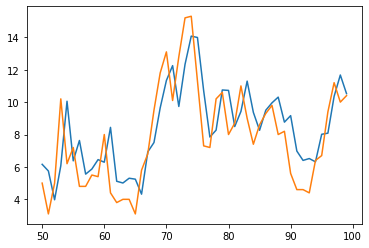

In [363]:
import matplotlib.pyplot as plt
plt.plot(train_results1['Train Predictions'][50:100])
plt.plot(train_results1['Actuals'][50:100])

In [364]:
val_predictions1 = model4.predict(X2_val).flatten()
val_results1 = pd.DataFrame(data={'Val Predictions':val_predictions1, 'Actuals':y2_val})
val_results1

,Val Predictions,Actuals
0,20.529427,19.2
1,18.984667,21.2
2,20.647369,20.5
3,19.965282,19.4
4,19.206923,23.2
...,...,...
1527,13.203094,11.8
1528,11.591023,11.2
1529,11.394126,11.6
1530,11.695881,10.4


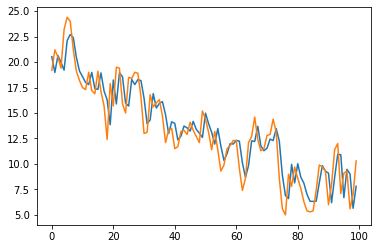

In [365]:
plt.plot(val_results1['Val Predictions'][:100])
plt.plot(val_results1['Actuals'][:100])

In [366]:
test_predictions1 = model4.predict(X2_test).flatten()
test_results1 = pd.DataFrame(data={'Test Predictions':test_predictions1, 'Actuals':y2_test})
test_results1

,Test Predictions,Actuals
0,10.276961,10.0
1,10.430056,11.4
2,11.412810,11.8
3,11.473744,13.0
4,12.372119,12.2
...,...,...
1526,5.954890,7.5
1527,7.569795,1.1
1528,0.875248,2.6
1529,3.892224,2.7


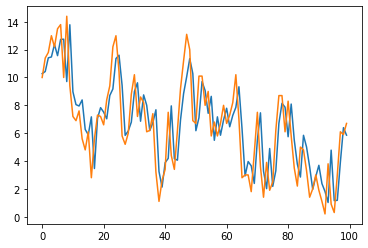

In [367]:
plt.plot(test_results1['Test Predictions'][:100])
plt.plot(test_results1['Actuals'][:100])

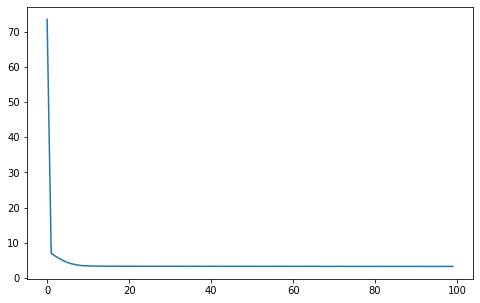

In [368]:
plt.figure(figsize=(8,5))
plt.plot(history1.history['loss'])

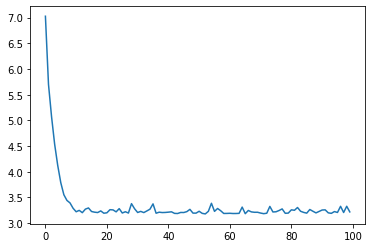

In [369]:
plt.plot(history1.history['val_loss'])

In [370]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(      Predictions  Actuals
 0       10.276961     10.0
 1       10.430056     11.4
 2       11.412810     11.8
 3       11.473744     13.0
 4       12.372119     12.2
 ...           ...      ...
 1526     5.954890      7.5
 1527     7.569795      1.1
 1528     0.875248      2.6
 1529     3.892224      2.7
 1530     3.309784     -0.8
 
 [1531 rows x 2 columns], 3.926425328626994)

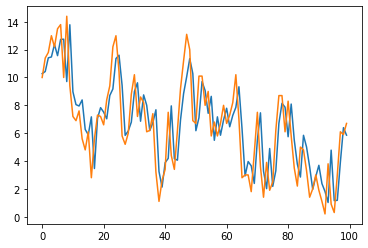

In [371]:
plot_predictions1(model4, X2_test, y2_test)